<a href="https://colab.research.google.com/github/mazprimrez/capstoneprojectDS/blob/master/Capstone%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
This Notebook will be used for capstone project, a data science specialization by IBM on Coursera

In [1]:
import numpy as np
import pandas as pd

# The Data

In [2]:
dataset = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
dataset.shape

(194673, 38)

In [5]:
for i in dataset.columns:
    print(f"{i}: {dataset[i].unique()}")

SEVERITYCODE: [2 1]
X: [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y: [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
OBJECTID: [     1      2      3 ... 219545 219546 219547]
INCKEY: [  1307  52200  26700 ... 311280 309514 308220]
COLDETKEY: [  1307  52200  26700 ... 312640 310794 309500]
REPORTNO: ['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008']
STATUS: ['Matched' 'Unmatched']
ADDRTYPE: ['Intersection' 'Block' 'Alley' nan]
INTKEY: [37475.    nan 34387. ... 36056. 38057. 26005.]
LOCATION: ['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1']
EXCEPTRSNCODE: [' ' nan 'NEI']
EXCEPTRSNDESC: [nan 'Not Enough Information, or Insufficient Location Information']
SEVERITYCODE.1: [2 1]
SEVERITYDESC: ['Injury Collision' 'P

# Data Cleaning

There are NaN value that filled with ' ' and 
'unknown' instead.

In [6]:
str_cols = dataset.select_dtypes(['object']).columns
dataset[str_cols] = dataset[str_cols].replace(' ',np.nan).replace('Unknown',np.nan)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   5638 non-null    object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
dataset.isna().sum().sort_values()

SEVERITYCODE           0
SEGLANEKEY             0
SDOT_COLDESC           0
SDOT_COLCODE           0
INCDTTM                0
INCDATE                0
VEHCOUNT               0
CROSSWALKKEY           0
PEDCOUNT               0
PERSONCOUNT            0
SEVERITYDESC           0
SEVERITYCODE.1         0
PEDCYLCOUNT            0
HITPARKEDCAR           0
STATUS                 0
REPORTNO               0
COLDETKEY              0
INCKEY                 0
OBJECTID               0
ADDRTYPE            1926
LOCATION            2677
UNDERINFL           4884
ST_COLDESC          4904
ST_COLCODE          4904
COLLISIONTYPE       4904
Y                   5334
X                   5334
JUNCTIONTYPE        6338
LIGHTCOND          18643
ROADCOND           20090
WEATHER            20172
SDOTCOLNUM         79737
INTKEY            129603
INATTENTIONIND    164868
SPEEDING          185340
EXCEPTRSNDESC     189035
EXCEPTRSNCODE     189035
PEDROWNOTGRNT     190006
dtype: int64

In this section I will delete some features such as features with NaN values more than 50k, features with desc values that already described by code, and ID number.

In [9]:
rem_col = dataset.isna().sum()[dataset.isna().sum().sort_values() > 50000].index

In [10]:
a = [col for col in dataset.columns if col not in rem_col]
a = [col for col in dataset[a].columns if col not in np.array(['SEVERITYCODE.1','LOCATION','SEVERITYDESC','INCDATE','INCDTTM',
                                                            'SDOT_COLDESC','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','OBJECTID','INCKEY',
                                                            'COLDETKEY','REPORTNO'])]

In [11]:
df = dataset[a]
df.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [12]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

SEVERITYCODE: [2 1]
X: [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y: [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
STATUS: ['Matched' 'Unmatched']
ADDRTYPE: ['Intersection' 'Block' 'Alley' nan]
COLLISIONTYPE: ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
PERSONCOUNT: [ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT: [0 1 2 3 4 5 6]
PEDCYLCOUNT: [0 1 2]
VEHCOUNT: [ 2  3  1  0  4  7  5  6  8 11  9 10 12]
JUNCTIONTYPE: ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Ramp Junction']
SDOT_COLCODE: [11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 5

In [13]:
df[a].shape

(194673, 18)

For UNDERINFL feature, the value seems weird, so I will change '1' to Y and '0' to 'N'

In [14]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['1','0'],['Y','N'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The Number of each category of severity code:

In [15]:
df.iloc[:,0].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [16]:
df.select_dtypes('float')

,X,Y
0,-122.323148,47.703140
1,-122.347294,47.647172
2,-122.334540,47.607871
3,-122.334803,47.604803
4,-122.306426,47.545739
...,...,...
194668,-122.290826,47.565408
194669,-122.344526,47.690924
194670,-122.306689,47.683047
194671,-122.355317,47.678734


ST_COLCODE must be int not object

In [17]:
df['ST_COLCODE'] = df['ST_COLCODE'].astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Exploratory Data Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [79]:
df_clean

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10.0,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,N,Raining,Wet,Dark - Street Lights On,11.0,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,N,Overcast,Dry,Daylight,32.0,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23.0,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Raining,Wet,Daylight,10.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,Matched,Block,Head On,3,0,0,2,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,24.0,N
194669,1,-122.344526,47.690924,Matched,Block,Rear Ended,2,0,0,2,Mid-Block (not related to intersection),14,N,Raining,Wet,Daylight,13.0,N
194670,2,-122.306689,47.683047,Matched,Intersection,Left Turn,3,0,0,2,At Intersection (intersection related),11,N,Clear,Dry,Daylight,28.0,N
194671,2,-122.355317,47.678734,Matched,Intersection,Cycles,2,0,1,1,At Intersection (intersection related),51,N,Clear,Dry,Dusk,5.0,N


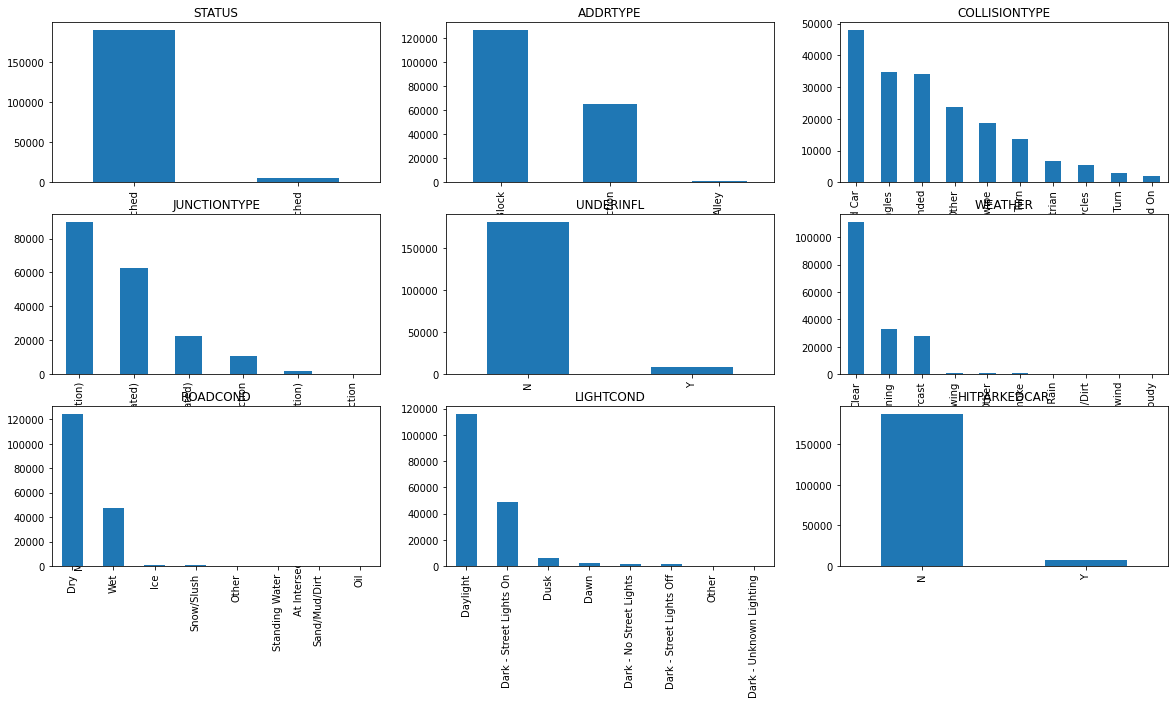

In [20]:
fig, axes = plt.subplots(3,3, figsize=(20,10))
axes = axes.flatten()

i = 0
for t in df.select_dtypes('object').columns:
    df[t].value_counts().plot(kind='bar', ax=axes[i], title=t)
    i +=1

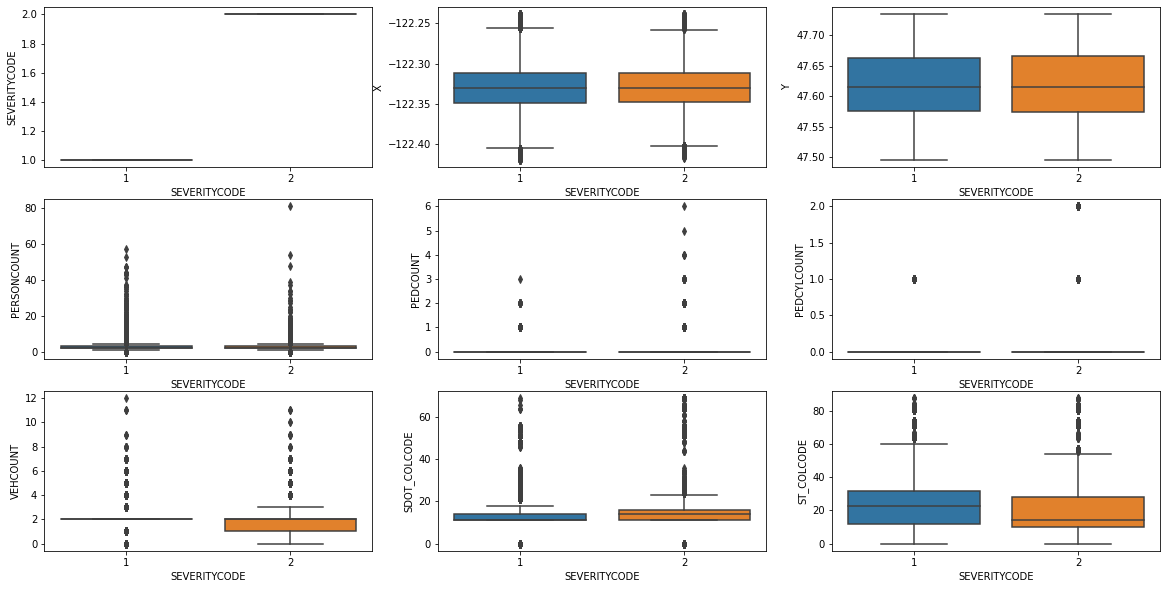

In [21]:
x_var = "SEVERITYCODE"
fig, axes = plt.subplots(3,3, figsize=(20,10))
axes = axes.flatten()

i = 0
for t in df.select_dtypes(['int','float']):
    ax = sns.boxplot(x=x_var, y=t, data=df, ax=axes[i])
    i +=1

# Encode Data
In this part, I will encode the categorical text data to int using OneHotEncoder by scikit-learn.

In [22]:
df.ST_COLCODE = df.ST_COLCODE.fillna(-1)
df_clean = df[df['X'].isna()==False]
df_clean[df_clean.select_dtypes('object').columns] = df_clean.select_dtypes('object').replace(np.nan,'Unknown')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [99]:
df_clean.corr()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ST_COLCODE
SEVERITYCODE,1.000000,0.010309,0.017737,0.128866,0.246722,0.214969,-0.058067,0.185926,-0.149119
X,0.010309,1.000000,-0.160262,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.022002
Y,0.017737,-0.160262,1.000000,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.026523
PERSONCOUNT,0.128866,0.012887,-0.013850,1.000000,-0.024764,-0.040317,0.375640,-0.136945,-0.184444
PEDCOUNT,0.246722,0.011304,0.010178,-0.024764,1.000000,-0.017461,-0.265337,0.267683,-0.251219
PEDCYLCOUNT,0.214969,-0.001752,0.026304,-0.040317,-0.017461,1.000000,-0.257882,0.393089,0.201667
VEHCOUNT,-0.058067,-0.012168,0.017058,0.375640,-0.265337,-0.257882,1.000000,-0.377330,-0.070465
SDOT_COLCODE,0.185926,0.010904,-0.019694,-0.136945,0.267683,0.393089,-0.377330,1.000000,0.287378
ST_COLCODE,-0.149119,-0.022002,-0.026523,-0.184444,-0.251219,0.201667,-0.070465,0.287378,1.000000


In [102]:
Xdata = df_clean.drop(columns='SEVERITYCODE')
y = df_clean['SEVERITYCODE']

In [103]:
X = pd.get_dummies(Xdata, drop_first=True)

In [ ]:
import umap
X = umap.UMAP(n_neighbors=30,min_dist=0.0,n_components=2,random_state=42).fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
print(f"After Delete the NaN values: {X.shape}")
print(f"Before delete the NaN values: {df.shape}")

# Modeling

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.45, random_state=42, shuffle=True)

Because the label data is imbalanced, I will balanced it using SMOTE

In [107]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='all')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [108]:
print(f"Before resampling: \n{y_train.value_counts()}")
print(f"After resampling: \n{pd.Series(y_sm).value_counts()}")

Before resampling: 
1    72709
2    31427
Name: SEVERITYCODE, dtype: int64
After resampling: 
2    72709
1    72709
dtype: int64


## Testing the best ML Classfier Model
In this part I will use some of Classifier model such as SVM, KNN, Decision tree, etc., after that I will use Random Search method to search the best hyperparameter.

### K-Nearest Neighbor

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_sm,y_sm)
knn.score(X_sm,y_sm)

0.8349035195092767

In [66]:
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,50), 'weights': ['uniform', 'distance']}

rsearch = RandomizedSearchCV(estimator=knn, param_distributions=params, cv=4, random_state=0)
rsearch.fit(X_sm,y_sm)

print(f"Best Parameter: {rsearch.best_params_}")
print(f"Best Score: {rsearch.best_score_}")

Best Parameter: {'weights': 'distance', 'n_neighbors': 28}
Best Score: 0.758193904554147


In [67]:
knn = KNeighborsClassifier(n_neighbors=rsearch.best_params_['n_neighbors'], weights=rsearch.best_params_['weights'])
knn.fit(X_sm,y_sm)
print(f"Train Accuracy: {knn.score(X_sm,y_sm)}")
print(f"Test Accuracy: {knn.score(X_test,y_test)}")

Train Accuracy: 0.9837227853498192
Test Accuracy: 0.6971820241071324
